# Práctica inicial 
## TP integrador - Primera parte
### EDA inicial - Obras Públicas (Dataset Provincia Bs. As)
#### Grupo_08 - Septiembre 2020

In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Una vez que descargamos el dataset procedemos a leerlo
obras = pd.read_csv('observatorio-de-obras-urbanas.csv')

In [3]:
# Como siempre vemos las dimensiones e imprimimos las primeras líneas
print(f'Tamaño del dataset: {np.shape(obras)}')
obras.head()

Tamaño del dataset: (1117, 36)


,id,entorno,nombre,etapa,tipo,area_responsable,descripcion,monto_contrato,comuna,barrio,...,beneficiarios,mano_obra,compromiso,destacada,ba_elige,link_interno,pliego_descarga,expediente-numero,estudio_ambiental_descarga,financiamiento
0,1,Plan 54 escuelas,Escuela de Educación Primaria N.° 24 D.E. 15 «...,Finalizada,Escuelas,Ministerio de Educación,Primaria,67065700.0,12.0,Villa Urquiza,...,NaN,NaN,NaN,SI,NaN,https://www.buenosaires.gob.ar/baobras/54-escu...,https://buenosaires.gob.ar/areas/planeamiento_...,914412-MDUGC-2013,NaN,NaN
1,2,Donado Holmberg,Calle Holmberg: Nivelación en cruce,Finalizada,Espacio Público,Secretaría de Transporte y Obras Públicas,En el marco del proyecto urbano del Barrio Par...,9950017.0,12.0,Villa Urquiza,...,NaN,16.0,NaN,NaN,NaN,https://www.buenosaires.gob.ar/baobras/Donado-...,https://www.buenosaires.gov.ar/areas/planeamie...,5515928/2014,NaN,NaN
2,3,Área Ambiental Central,Área Ambiental Central: Calles Alsina Y Moreno,Finalizada,Espacio Público,Secretaría de Transporte y Obras Públicas,Se intervinieron los tramos comprendidos entre...,36942632.0,1.0,Montserrat,...,NaN,55.0,SI,NaN,NaN,https://www.buenosaires.gob.ar/baobras/area-am...,https://www.buenosaires.gov.ar/areas/planeamie...,NaN,NaN,NaN
3,4,Área Ambiental Central,Área Ambiental Central: Calle Esmeralda I,Finalizada,Espacio Público,Secretaría de Transporte y Obras Públicas,La obra incluyó el tramo ubicado entre la Av. ...,26938294.0,1.0,San Nicolás,...,NaN,59.0,SI,NaN,NaN,https://www.buenosaires.gob.ar/baobras/area-am...,https://www.buenosaires.gov.ar/areas/planeamie...,NaN,NaN,NaN
4,5,Villa Olímpica,Villa Olímpica: Demoliciones en el Parque de l...,Finalizada,Vivienda,Secretaría de Transporte y Obras Públicas,Se realizó las demoliciones de las construccio...,6990315.0,8.0,Villa Soldati,...,NaN,NaN,SI,NaN,NaN,https://www.buenosaires.gob.ar/baobras/villa-o...,https://www.buenosaires.gov.ar/areas/planeamie...,13793268/DGPUYA/2014,NaN,NaN


## Objetivo del Proyecto:
### Alt. 1: Predicción en función del barrio y el tipo de obra a realizar, el monto del contrato
### Alt. 2: Predicción en función del tipo de obra y monto de contrato, el tiempo de realización

#### Primera parte, EDA y pre-procesamiento de datos

In [ ]:
# Procedemos a visualizar correctamente todas las columnas del dataset y guardamos en una variable llamada columnas
columnas = obras.columns
columnas

In [ ]:
# Queremos conocer si alguna de las columnas posee valores nulos.
# En caso de ser variables de interés, procederemos a explorarlas
obras.isnull().sum()



In [ ]:
# Vemos cantidad y % de NaN por columna.
# El dato de % nos va a servir a la hora de tomar la decisión de borrar o no filas con NaNs.
total = obras.isnull().sum().sort_values(ascending=False)
percent = (obras.isnull().sum()/obras.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

## Variables de interés a analizar:
- Etapa
- Tipo
- Monto del contrato
- Barrio
- Latitud
- Longitud
- Plazo en meses

### Etapa

In [7]:
# En primer lugar, analizaremos la feature "etapa"
# Comenzaremos analizando cómo vienen dados los valores, para ver si es necesario procesarlos
etapas= len(obras['etapa'].unique()) 
print(f'En total hay {etapas} etapas de obras."\r\n')
print("\n", obras['etapa'].unique())

En total hay 5 etapas de obras."


 ['Finalizada' 'En ejecución' 'En proyecto' 'En licitación' 'En Ejecución']


In [8]:
# Agruparemos en ejecución, en licitación y en proyecto, ya que para el caso, pueden ser consideradas similares:

def clean_row(row):
    a= ['En ejecución','En proyecto','En Ejecución']
    
    if row.etapa in a:
        return 'En ejecución'
    return row.etapa

def clean_df(obras):
    obras_cleaned=obras.copy()
    obras_cleaned['etapa']=obras_cleaned.apply(lambda row: 
                                                   clean_row(row),axis=1)
    return obras_cleaned

obras_cleaned=clean_df(obras)
print(obras_cleaned.etapa.unique())

# Con esto ya queda ok, porque como vimos antes, no hay ninguna sample sin estapa

['Finalizada' 'En ejecución' 'En licitación']


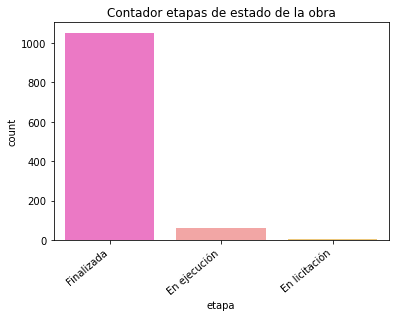

In [9]:
# Visualizamos rápidamente con un countplot

ax = sns.countplot(x='etapa', 
                   data=obras_cleaned, 
                   palette='spring',
                   alpha=0.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Contador etapas de estado de la obra')
plt.show()

# Vemos que el grueso de los samples ya están finalizados

### Tipo

In [10]:
# Analizamos la cantidad de valores únicos en el feature de tipo de obra
tipos_obras = len(obras['tipo'].unique()) 
print(f'En total hay {tipos_obras} tipos de obras."\r\n')
print("\n", obras['tipo'].unique())

En total hay 7 tipos de obras."


 ['Escuelas' 'Espacio Público' 'Vivienda' 'Hidráulica e Infraestructura'
 'Arquitectura' 'Transporte' 'Salud']


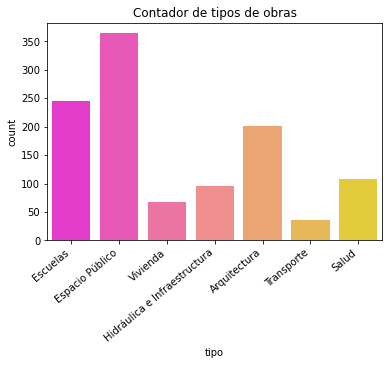

In [11]:
# En este caso no es necesario re agrupar los valores únicos
# Y tampoco se requiere de análisis de NaNs, pero vamos a graficar para comenzar a visualizar:
ax = sns.countplot(x='tipo', 
                   data=obras,
                   palette='spring')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Contador de tipos de obras")
plt.show()

In [12]:
obras_cleaned.groupby('tipo')['monto_contrato'].describe().astype('int64')

,count,mean,std,min,25%,50%,75%,max
tipo,,,,,,,,
Arquitectura,194,47439458,169470659,146589,1247909,4061973,15350381,1389607260
Escuelas,207,19057011,57600108,47514,1119533,2991264,12057331,697650207
Espacio Público,356,19830220,59924315,56103,2569173,7619702,19941790,903283412
Hidráulica e Infraestructura,86,66164597,314760879,104574,946206,3470637,41492140,2893118429
Salud,105,22090619,39856387,241731,2828072,7489486,19060730,296735562
Transporte,33,558305555,922219981,1741124,40185440,114299267,266717844,3183200000
Vivienda,66,156850269,250527395,245946,22766531,102350323,195953091,1624752066


In [22]:
obras_cleaned.groupby('tipo')['percentil90'].describe().astype('int64')

,count,mean,std,min,25%,50%,75%,max
tipo,,,,,,,,
Arquitectura,201,47683086,166483473,146589,1276501,4288880,18884253,1389607260
Escuelas,245,24544216,54458787,47514,1493450,4719903,44355506,697650207
Espacio Público,364,20590766,59477691,56103,2616426,8118505,20604073,903283412
Hidráulica e Infraestructura,95,65053375,299333406,104574,988678,4500081,54435039,2893118429
Salud,108,22989075,39654888,241731,2873438,7799631,22750437,296735562
Transporte,36,516316345,893050235,1741124,45054563,100756228,254104461,3183200000
Vivienda,68,153838056,247374850,245946,23921465,93104968,184779274,1624752066


In [13]:
# Dan todos mal

In [14]:
obras_cleaned.shape

(1117, 36)

In [ ]:
#percentil_90 = obras_cleaned.groupby('tipo')['monto_contrato'].quantile(0.90)

In [ ]:
#percentil_90 = percentil_90.astype(str)

In [18]:
# Feature engineering
obras_cleaned['percentil90'] = obras_cleaned['monto_contrato'].fillna(54435039)

In [ ]:
#obras_arquitectura = obras_cleaned.loc[obras_cleaned['tipo'] == 'Arquitectura']

In [ ]:
#obras_cleaned['percentil90'] = obras_cleaned['monto_contrato'].fillna(10)

In [20]:
obras_cleaned.groupby('tipo')['percentil90'].describe().astype('int64')

,count,mean,std,min,25%,50%,75%,max
tipo,,,,,,,,
Arquitectura,201,47683086,166483473,146589,1276501,4288880,18884253,1389607260
Escuelas,245,24544216,54458787,47514,1493450,4719903,44355506,697650207
Espacio Público,364,20590766,59477691,56103,2616426,8118505,20604073,903283412
Hidráulica e Infraestructura,95,65053375,299333406,104574,988678,4500081,54435039,2893118429
Salud,108,22989075,39654888,241731,2873438,7799631,22750437,296735562
Transporte,36,516316345,893050235,1741124,45054563,100756228,254104461,3183200000
Vivienda,68,153838056,247374850,245946,23921465,93104968,184779274,1624752066


In [21]:
obras_cleaned.isnull().sum()

id                               0
entorno                          2
nombre                           0
etapa                            0
tipo                             0
area_responsable                 0
descripcion                     38
monto_contrato                  70
comuna                           7
barrio                           6
direccion                       99
lat                              9
lng                              9
fecha_inicio                    51
fecha_fin_inicial               30
plazo_meses                    100
porcentaje_avance                0
imagen_1                        49
imagen_2                       451
imagen_3                       664
imagen_4                       825
licitacion_oferta_empresa       72
licitacion_anio                358
contratacion_tipo              778
nro_contratacion               874
cuit_contratista               328
beneficiarios                  922
mano_obra                      864
compromiso          

In [ ]:
obras_escuelas = obras_cleaned.loc[obras_cleaned['tipo'] == 'Escuelas']

### Monto del contrato 

In [ ]:
# Hay algunos NaNs también, se van

obras_cleaned.dropna(subset=['monto_contrato'], how='any', inplace=True, axis='index')
filas2 = np.shape(obras_cleaned)[0] 
print(f'Filas: {filas2}')

In [15]:
# Para esta feature, nos interesan más los datos descriptivos de los valores registrados

obras_cleaned['monto_contrato'].describe().astype('int')

# Nuestro valor máximo es negativo?? Está chequeado?

count          1047
mean       54435039
std       233990588
min           47514
25%         1760971
50%         6495745
75%        24848133
max     -2147483648
Name: monto_contrato, dtype: int32

In [16]:
# Dont worry, era una cuestión del int

obras_cleaned.groupby('tipo')['monto_contrato'].aggregate('max').astype('int64')


tipo
Arquitectura                    1389607260
Escuelas                         697650207
Espacio Público                  903283412
Hidráulica e Infraestructura    2893118429
Salud                            296735562
Transporte                      3183200000
Vivienda                        1624752066
Name: monto_contrato, dtype: int64

In [17]:
# Va de nuevo:

obras_cleaned['monto_contrato'].describe().astype('int64')

# Ahora seee

count          1047
mean       54435039
std       233990588
min           47514
25%         1760971
50%         6495745
75%        24848133
max      3183200000
Name: monto_contrato, dtype: int64

In [ ]:
# Según entendí al tener un std mayor a la media hay un sesgo, deberíamos ver qué onda los outliers

percentil_90 = obras_cleaned['monto_contrato'].quantile(0.90)

In [ ]:
percentil_90.astype(int)

In [ ]:
obras_90 = obras_cleaned.loc[obras_cleaned['monto_contrato']<percentil_90]
obras_outliers = obras_cleaned.loc[obras_cleaned['monto_contrato']>percentil_90]

In [ ]:
obras_90.shape

In [ ]:
obras_90.describe().astype('int64')

In [ ]:
obras_90['monto_contrato'].describe().astype('int64')

In [ ]:
obras_90.head()

In [ ]:
# Vamos a graficar esto, ya sabemos que varios samples no tienen el valor del contrato
# Una de las cosas que buscamos es estimar el monto, si no lo tienen no me sirve
# Borramos los que no tengan monto :o

#obras_cleaned.dropna(subset=['monto_contrato'], how='any', inplace=True, axis='index')
#filas = np.shape(obras_cleaned)[0] 
#print(f'Filas: {filas}')

sns.kdeplot(obras_60.monto_contrato, color="purple", shade = True)
plt.xlabel("Price")
plt.title('Distribucion de Precio',size = 20)
plt.show()

# Plot Log-Precio
sns.distplot(np.log(1+obras_60['monto_contrato']),color='purple')
plt.xlabel("Price")
plt.title('Distribucion de Precio logarítmica',size = 20)
plt.show()

# Facherito el segundo

### Barrio

In [ ]:
# Analizamos la cantidad de valores únicos en el feature de barrio
barrio = len(obras_cleaned['barrio'].unique()) 
print(f'En total hay {barrio} barrios en el análisis.\r\n')
print("\n", obras_cleaned['barrio'].unique())

In [ ]:
# Algún mono escribió mal (montserrat)
# Villa del Parque está repetido por una mayúscula
# A alguien le salió el turro y puso LA BOCA y otro solo Boca


def clean_row(row):
    a= ['La Boca','Boca']
    b= ['Montserrat','Monserrat']
    c= ['Villa Del Parque','Villa del Parque']
    
    if row.barrio in a:
        return 'La Boca'
    if row.barrio in b:
        return 'Monserrat'
    if row.barrio in c:
        return 'Villa del Parque'
    return row.barrio

def clean_df(obras_cleaned):
    obras_cleaned=obras_cleaned.copy()
    obras_cleaned['barrio']=obras_cleaned.apply(lambda row: 
                                                   clean_row(row),axis=1)
    return obras_cleaned

obras_cleaned=clean_df(obras_cleaned)
print(obras_cleaned.barrio.unique())


In [ ]:
# Hay algunos NaNs también, se van

obras_cleaned.dropna(subset=['barrio'], how='any', inplace=True, axis='index')
filas2 = np.shape(obras_cleaned)[0] 
print(f'Filas: {filas2}')

# Teníamos 1047, así que se fueron solo 5, está bien, no fue tan grave

In [ ]:
# Probamos visualizar

ax = sns.countplot(x='barrio', data=obras_cleaned)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Contador de obras por barrio")
plt.show()

In [ ]:
# Fuck, son muchas

top = obras_cleaned['barrio'].value_counts().index[0:10]


plt.figure(figsize=(15,3))
g = sns.countplot(x='barrio',
                  data=obras_cleaned, 
                  palette = 'spring',
                  order=top)
g.set_xticklabels(g.get_xticklabels(), 
                  rotation=90, 
                  ha="right")
plt.title('Cuenta por Barrio',size = 20)
plt.xlabel('Barrio')
plt.ylabel('Count')
plt.show()

# A ver qué onda con los más bajos

bottom = obras_cleaned['barrio'].value_counts().index[43:53]
plt.figure(figsize=(15,3))
h = sns.countplot(x='barrio',
                  data=obras_cleaned, 
                  palette = 'viridis',
                  order=bottom)
h.set_xticklabels(h.get_xticklabels(), 
                  rotation=90, 
                  ha="right")
plt.title('Cuenta por Barrio',size = 20)
plt.xlabel('Barrio')
plt.ylabel('Count')
plt.show()

# MMMMM 2 barrios con sólo una obra, creo que nos va a arruinar el accuracy, pruebo con comuna

### Comunas

In [ ]:
# Analizamos la cantidad de valores únicos en la feature de comuna
# Guarda, estoy tomando el obras_cleaned de antes, si no tomamos barrio hay que anular las líneas!!!

comuna = len(obras_cleaned['comuna'].unique()) 
print(f'En total hay {comuna} comunas en el análisis.\r\n')
print("\n", obras_cleaned['comuna'].unique())

In [ ]:
# La diferencia entre barrio y comuna era un NaN (al ppio del notebook)
# Lo voy a sacar y rezar que sea ese solito y no haya borrado nada más

obras_cleaned.dropna(subset=['comuna'], how='any', inplace=True, axis='index')
filas3 = np.shape(obras_cleaned)[0] 
print(f'Filas: {filas3}')

# No, saqué de más, si vamos con comunas hay que modificar esto!!!!!

In [ ]:
ax = sns.countplot(x='comuna', 
                   data=obras_cleaned,
                   palette='gist_rainbow',
                   alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Contador de obras por comuna")
plt.show()

### Latitud y longitud 

In [ ]:
# Probanding plotear en mapa, sólo para esto

#obras_cleaned.plot(kind='scatter', 
                   #x='lng', 
                   #y='lat', 
                   #cmap=plt.get_cmap(), 
                   #colorbar=True, 
                   #alpha=0.5, 
                   #figsize=(10,8))
#plt.show()

# El primer gráfico me pareció medio feo, se pueden sacar los # y verlo, pero al pedo

plt.figure(figsize=(13,13))
sns.scatterplot(x=obras_cleaned.lng,
                y=obras_cleaned.lat,
                hue=obras_cleaned.comuna,
                palette='muted')
plt.show()

# Podríamos buscar alguna etiqueta mejor para la comuna
# https://www.buenosaires.gob.ar/comunas

### Plazo en meses

In [ ]:
# Analizamos la cantidad de valores únicos en la feature de plazos de realización

meses = len(obras_90['plazo_meses'].unique()) 
print("\n", obras_90['plazo_meses'].unique())

In [ ]:
# Primero vamos a sacar los NaNs
# Vamos a agrupar en períodos

#obras_cleaned.dropna(subset=['plazo_meses'], how='any', inplace=True, axis='index')
#filas4 = np.shape(obras_cleaned)[0] 
#print(f'Filas: {filas4}')

def clean_row(row):
    a= [0,1,2,3,4,5,6,7,8,9,10,11,12]
    b= [13,14,15,16,17,18,19,20,21,22,23,24]
    c= [25,26,27,28,29,30,31,32,33,34,35,36]
    d= [37,38,39,40,41,42,43,44,45,46,47,48,57,52,55,86]
    #e= [57,52,55,86]
    
    if row.plazo_meses in a:
        return 'Menos de 1 año'
    if row.plazo_meses in b:
        return 'De 1 a 2 años'
    if row.plazo_meses in c:
        return 'De 2 a 3 años'
    if row.plazo_meses in d:
        return 'Más de 3 años'
    #if row.plazo_meses in e:
        #return 'Más de 4 años'
    
    
    return row.plazo_meses

def clean_df(obras_60):
    obras_60=obras_60.copy()
    obras_60['plazo_años']=obras_60.apply(lambda row: 
                                                   clean_row(row),axis=1)
    return obras_60

obras_60=clean_df(obras_60)

print(obras_60.plazo_meses.unique())

#Agregar una columna en cuanto a plazo meses (hacer!)

In [ ]:
# Vamos a agrupar en períodos
# Para no reemplazar los datos exactos de los plazos, vamos a crear una nueva columna "Plazo en años".

obras_60['plazo_años'] = obras_60['plazo_meses']

# En esta nueva columna, reemplazamos los valores agrupando por períodos.

def clean_row(row):
    a= [0,1,2,3,4,5,6,7,8,9,10,11,12]
    b= [13,14,15,16,17,18,19,20,21,22,23,24]
    c= [25,26,27,28,29,30,31,32,33,34,35,36]
    d= [37,38,39,40,41,42,43,44,45,46,47,48,57,52,55,86]
    #e= [57,52,55,86]
    
    if row.plazo_años in a:
        return 'Menos de 1 año'
    if row.plazo_años in b:
        return 'De 1 a 2 años'
    if row.plazo_años in c:
        return 'De 2 a 3 años'
    if row.plazo_años in d:
        return 'Más de 3 años'
    #if row.plazo_meses in e:
        #return 'Más de 4 años'
    
    
    return row.plazo_años

def clean_df(obras_60):
    obras_60=obras_60.copy()
    obras_60['plazo_años']=obras_60.apply(lambda row: 
                                                   clean_row(row),axis=1)
    return obras_60

obras_cleaned=clean_df(obras_60)

print(f'Los plazos de las obras ahora quedarán agrupados como:"\r\n')
print(obras_cleaned.plazo_años.unique())

In [ ]:
obras_cleaned.shape

In [ ]:
ax = sns.countplot(x='plazo_años', 
                   data=obras_cleaned,
                   palette='gist_rainbow',
                   alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Tiempo de realización")
plt.show()

In [ ]:
g = sns.catplot(x='plazo_años', y='monto_contrato',
                data=obras_cleaned, 
                kind="box", # box , violin
                height = 5,aspect=3 ,palette = "muted")
g.set_xticklabels(rotation=90)
g = g.set_ylabels("monto_contrato")
plt.title('Boxplot',size = 20)
plt.show()

In [ ]:
#Primero defininmos los limites de cada categoria y creemos la columna 'Monto'
#acá con loc le indicamos que queremos sólo esos registros


obras_cleaned.loc[(obras_cleaned['monto_contrato'] > 0) & (obras_cleaned['monto_contrato'] <= 4760), 'monto'] = 'Mínimo'
obras_cleaned.loc[(obras_cleaned['monto_contrato'] > 4760) & (obras_cleaned['monto_contrato'] <= 1760971), 'monto'] = 'Primer Q'
obras_cleaned.loc[(obras_cleaned['monto_contrato'] > 1760971) & (obras_cleaned['monto_contrato'] <= 6495745), 'monto'] = 'Segundo Q'
obras_cleaned.loc[(obras_cleaned['monto_contrato'] > 6495745) & (obras_cleaned['monto_contrato'] <= 24848133), 'monto'] = 'Tercer Q'
obras_cleaned.loc[(obras_cleaned['monto_contrato'] > 24848133), 'monto'] = 'Máximo'

In [ ]:
obras_cleaned.head()

In [ ]:
np.shape(obras_cleaned)

## Ahora a buscar si están relacionados los features

In [ ]:
# Matriz de correlación para ver si son lineales
corr = obras_cleaned.corr()

fig, ax = plt.subplots(figsize=(10, 8))
#Permitimos anotaciones y numeros (float) sobre el mapa
sns.heatmap(corr, cmap='summer', annot=True, fmt=".2f", alpha=0.6)

plt.show()
# Monto contrato - meses
# Monto contrato - mano de obra

In [ ]:
graf=obras_cleaned.loc[:,['etapa','tipo', 'monto_contrato','comuna', 'barrio','mano_obra']]

sns.pairplot(data=graf)
plt.show()

# los valores string no me van a traer nada.. tendría que convertirlos en dummies

### Pre processing y aplicación de modelos de clasificación (Alt.2)

In [ ]:
# Nuestro target
y=obras_cleaned.iloc[:,15]
print(y)

In [ ]:
# Nuestras features
x=obras_cleaned.iloc[:,7:9:1]
print(x)
type(x)

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
# No sé que modelo va a servir, así que por las dudas importo todos:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Vamos a agregar un encoder al target o variable objetivo
le= preprocessing.LabelEncoder()
y= le.fit_transform(y)
obras_cleaned['Encoded']=y

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=2)

In [ ]:
# Estandarizar el set de entrenamiento

scaler=preprocessing.StandardScaler().fit(x_train)

In [ ]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

#### Entrenamos con KNN

In [ ]:
parameters={'n_neighbors': [15, 16, 17, 18, 19, 20, 21, 22, 23]}
knn=KNeighborsClassifier()
clasif=GridSearchCV(knn, param_grid=parameters, refit=True, cv=5)
clasif.fit(x_train_scaled,y_train)

In [ ]:
clasif.best_params_

In [ ]:
predic=clasif.predict(x_test_scaled)

In [ ]:
print(accuracy_score(y_test,predic))

#### Entrenamos con LR

In [ ]:
parameters={'C': [ 2, 3, 4, 4.1, 4.2, 4.3,4.4, 4.5, 4.8, 5, 5.2, 5.5, 5.9,  6, 7, 8, 9, 10, 100]}
lr_model=LogisticRegression (random_state=8, solver='lbfgs')
clasif1=GridSearchCV(lr_model, param_grid=parameters, refit=True, cv=5)
clasif1.fit(x_train_scaled, y_train)

In [ ]:
clasif1.best_params_

In [ ]:
predic1=clasif1.predict(x_test_scaled)
print(accuracy_score(y_test,predic1))

#### Entrenamos con SVM

In [ ]:
parameters={'kernel':('linear','rbf'),
            'C':[0.3, 0.4, 0.5, 0.6, 0.62, 0.65, 0.68, 0.7, 0.8, 0.9],
            'gamma':[  5.5, 5.8, 6,6.1, 6.2, 6.3,6.4,6.5, 6.8]}
svc=svm.SVC(probability=True)
clasif2=GridSearchCV(svc, param_grid=parameters, refit=True, cv=5)
clasif2.fit(x_train_scaled,y_train)

In [ ]:
clasif2.best_params_

In [ ]:
predic2=clasif2.predict(x_test_scaled)
print(accuracy_score(y_test,predic2))

In [ ]:
print(accuracy_score(y_test,predic),
     accuracy_score(y_test,predic1),
     accuracy_score(y_test,predic2))